In [1]:
import cv2 
import os 
import glob
import json
import numpy as np
import matplotlib.pyplot as plt 


from tqdm import tqdm 
from module.utils import imread, imfindcircles
from module.disp_measure import displacement_measure

100%|██████████████████████████████████████████████████████████████████████████████████| 68/68 [04:12<00:00,  3.72s/it]


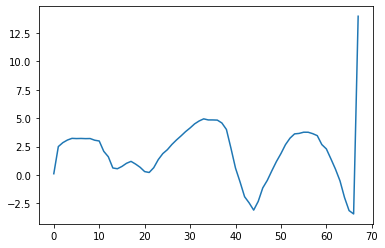

In [2]:
# 센서 번호 입력
sensor_num = 196
sensor_num = str(sensor_num)

# 센서 번호에 따른 이미지 리스트 호출
img_list = glob.glob(os.path.join(r'imgs', sensor_num, '*.jpg'))

# 센서 번호에 따른 세부 파라메터 호출 
with open('params.json') as param_config_json : 
    param_config = json.load(param_config_json)
    
params = param_config[sensor_num]


result = [] # 결과를 저장할 result list 

# 최초 source image에서 circle detection 수행 
src_img = imread(img_list[0])
centers, r_estimated, metric = imfindcircles(src_img, 
                                             [params['min_rad'], params['max_rad']],
                                            sensitivity = 0.96)
src_circles = np.concatenate((centers, r_estimated[:,np.newaxis]), axis = 0).T
src_circles = np.squeeze(src_circles)

# 호출된 이미지 목록에서 displacement_measure 수행 
for img_path in tqdm(img_list[:100]): 
    dest_img = imread(img_path)
    
    '''
    변경사항
    1. 함수 이름을 displacement_measure로 변경하였습니다. 
    2. displacement_measure에 필요한 변수는 아래와 같습니다. 
        1) dest_img : 측정 대상 이미지 
        2) src_img : 고정점 이미지 
        3) src_circles : 고정점 이미지에서 탐지된 원들의 중심 좌표 및 지름 (고정점 이미지에서 변위 재측정 방지용)
        4) min_rad : 최소 원의 지름 크기 / max_rad : 최대 원의 지름 크기 
    '''
    disp, dest_circles = displacement_measure(dest_img,
                                              src_img,
                                              src_circles = src_circles,                                            
                                              min_rad = params['min_rad'],
                                              max_rad = params['max_rad'])
    
    result.append(disp)
    for dest_circle in dest_circles : 
        dest_img = cv2.circle(dest_img, tuple(np.asarray(dest_circle[:2], dtype =np.int64)), int(dest_circle[2]), (0,255,0), thickness=1, lineType=8, shift=0)
    cv2.imwrite(img_path[:-4] + '_with_circles_result.jpeg', dest_img)
    
collect_rslt = []
for rslt in result : 
    collect_rslt.append(rslt[0])
    
plt.plot(np.array(collect_rslt))

In [2]:
## check the circle detection accuracy 

param1 = 200
param2 = 14
min_rad = 75
max_rad = 90
img = imread(r'imgs\196\Img_196_20200829_190100.jpg') 


centers, r_estimated, metric = imfindcircles(img, 
                                             [min_rad, max_rad],
                                             sensitivity = 0.99)
circles = np.concatenate((centers, r_estimated[:,np.newaxis]), axis = 0).T
circles = np.squeeze(circles)

# Draw circles that are detected. 
if circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    circles = np.uint16(np.around(circles)) 
  
    for pt in circles: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        cv2.imshow("Detected Circle", img) 
        cv2.waitKey(0) 
else:
        cv2.imshow('Circle is not detected', img)
        cv2.waitKey(0) 


In [13]:
start_p = time.time()

sensitivity = 0.96
centers = []
r_estimated = []
metric = []
radiusRange = [35, 45]

A = imread(img_list[0]) 

centers, r_estimated, metric = imfindcircles(A, radiusRange,  ObjectPolarity = 'bright', sensitivity = 0.95)
